In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
# Câu 1. Có bao nhiêu khối thi (KT) trong trong dữ liệu.
kt_values = df['KT'].unique()  # Lấy các giá trị duy nhất của cột 'KT'
num_kt = len(kt_values)  

print(num_kt)

5


In [4]:
# Đổi tên 
df.rename(columns={
    'TOANLOGICPHANTICH': 'LOGIC',
    'GIAIQUYETVANDE': 'VANDE'
}, inplace=True)

In [16]:
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,VANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


C:\Users\T14\AppData\Local\Temp\ipykernel_2080\4022794095.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=median_T1, x='KT', y='T1', hue='KV', ci=None)


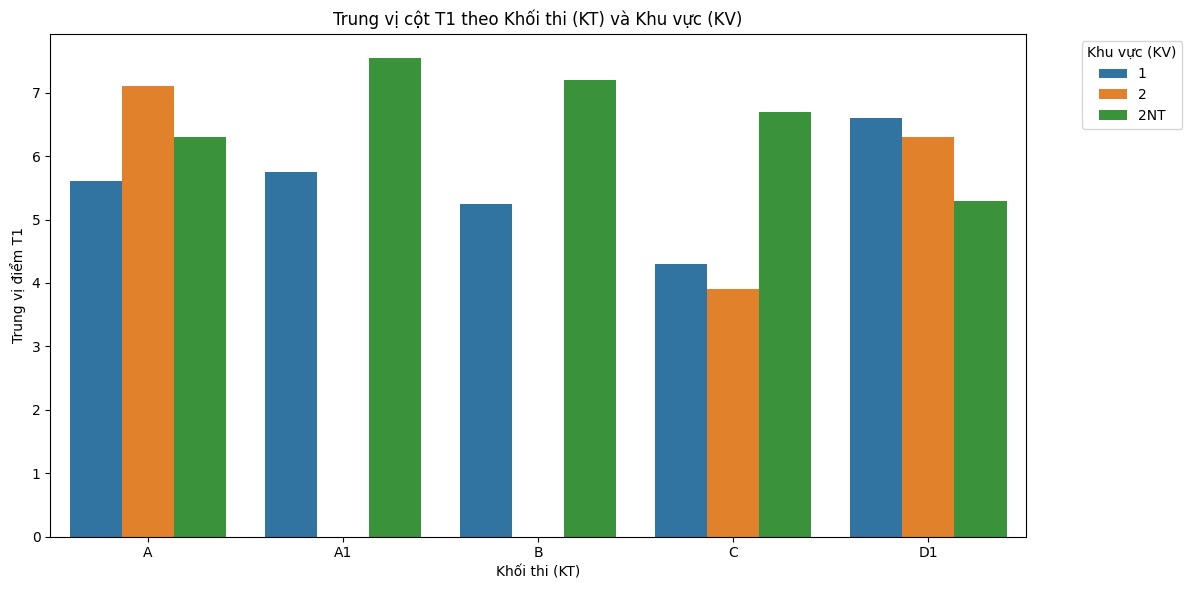

In [5]:
# Câu 2. Vẽ Bar chart thống kê trung vị cột điểm T1 theo khối thi (KT) trên từng khu vực (KV)
# Khối thi (KT) nào thống kê điểm T1 có ít khu vực (KV) nhất.

import matplotlib.pyplot as plt
import seaborn as sns
# Bước 1: Tính trung vị của T1 theo khối thi (KT) và khu vực (KV)
median_T1 = df.groupby(['KT', 'KV'])['T1'].median().reset_index()

# Đếm số lượng khu vực (KV) trong mỗi khối thi (KT)
kv_counts = median_T1.groupby('KT')['KV'].nunique()

# Bước 2: Vẽ Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=median_T1, x='KT', y='T1', hue='KV', ci=None)
plt.title("Trung vị cột T1 theo Khối thi (KT) và Khu vực (KV)")
plt.xlabel("Khối thi (KT)")
plt.ylabel("Trung vị điểm T1")
plt.legend(title="Khu vực (KV)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Cột T1: p-value = 0.1401
Cột T2: p-value = 0.3527
Cột T3: p-value = 0.0502
Cột T4: p-value = 0.1641
Cột T5: p-value = 0.0537
Cột T6: p-value = 0.0255
Cột NGONNGU: p-value = 0.0274
Cột LOGIC: p-value = 0.0140

Các cột có phân phối gần với phân phối chuẩn (p-value >= 0.05):
['T1', 'T2', 'T3', 'T4', 'T5']


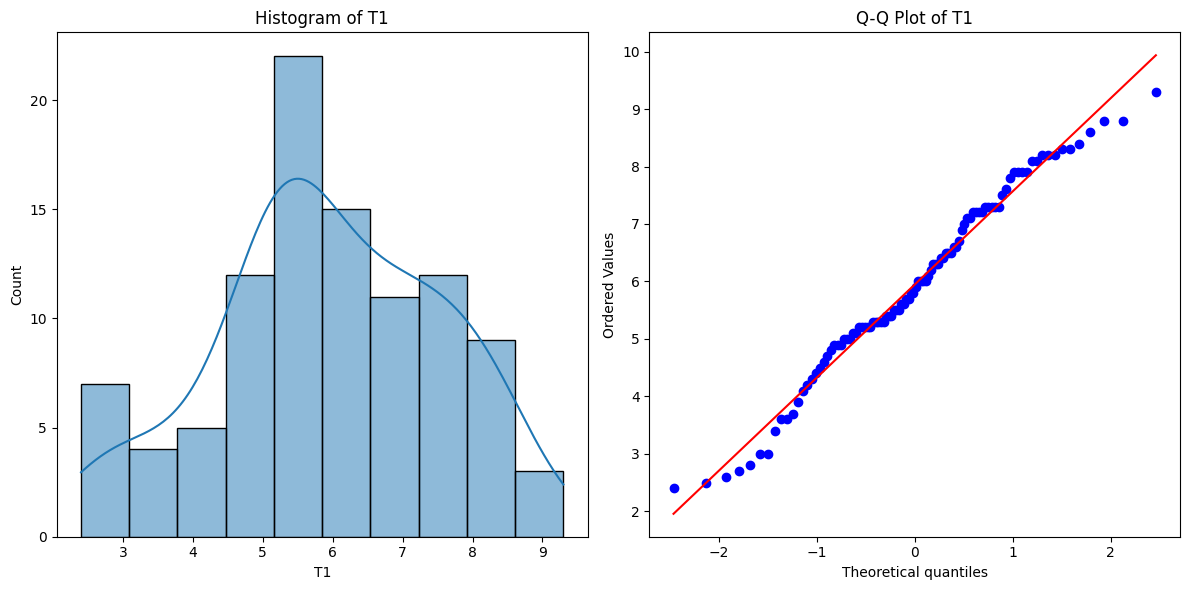

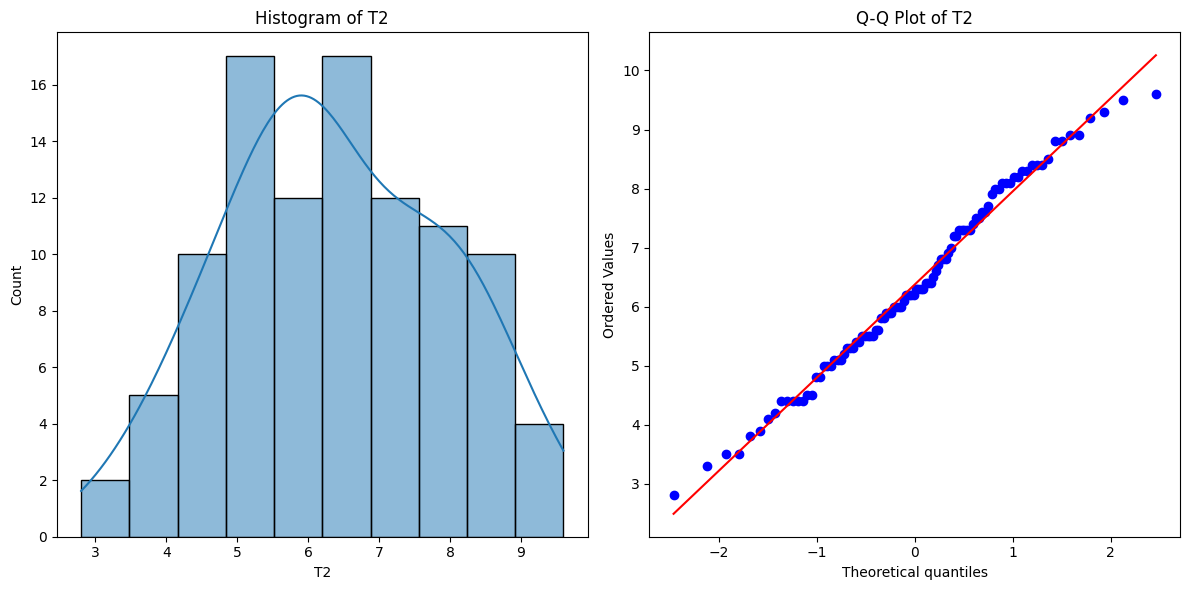

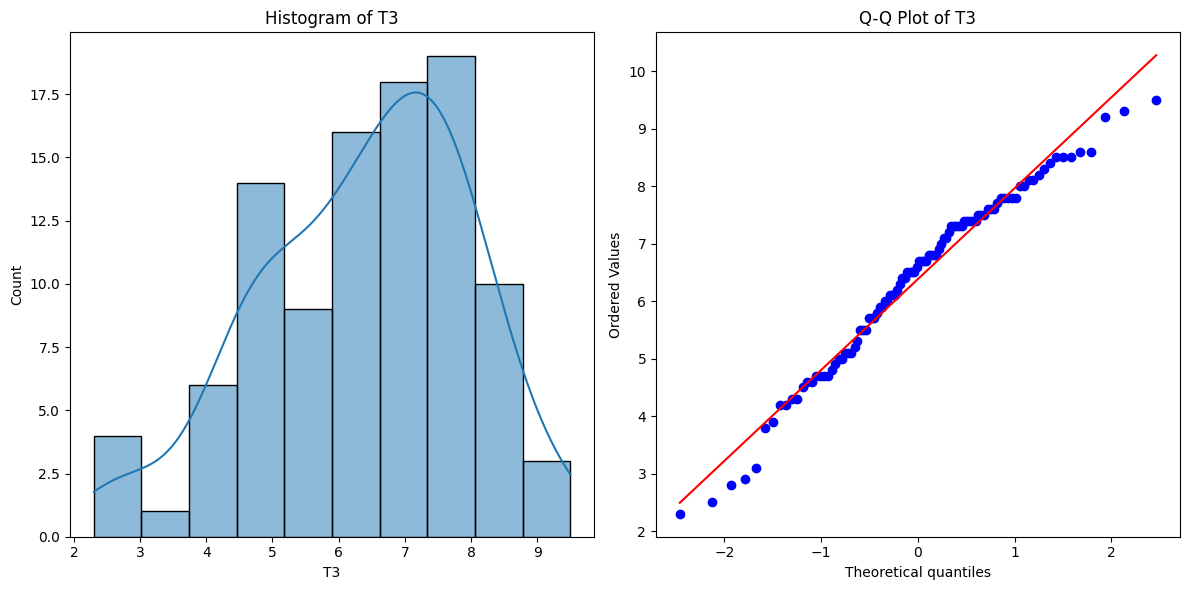

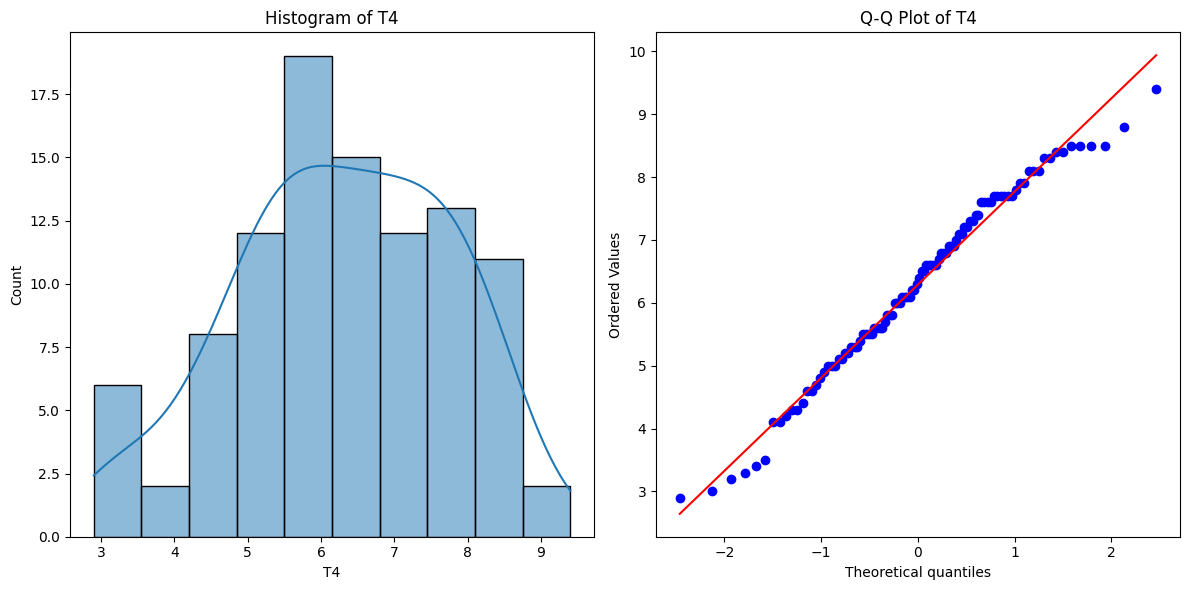

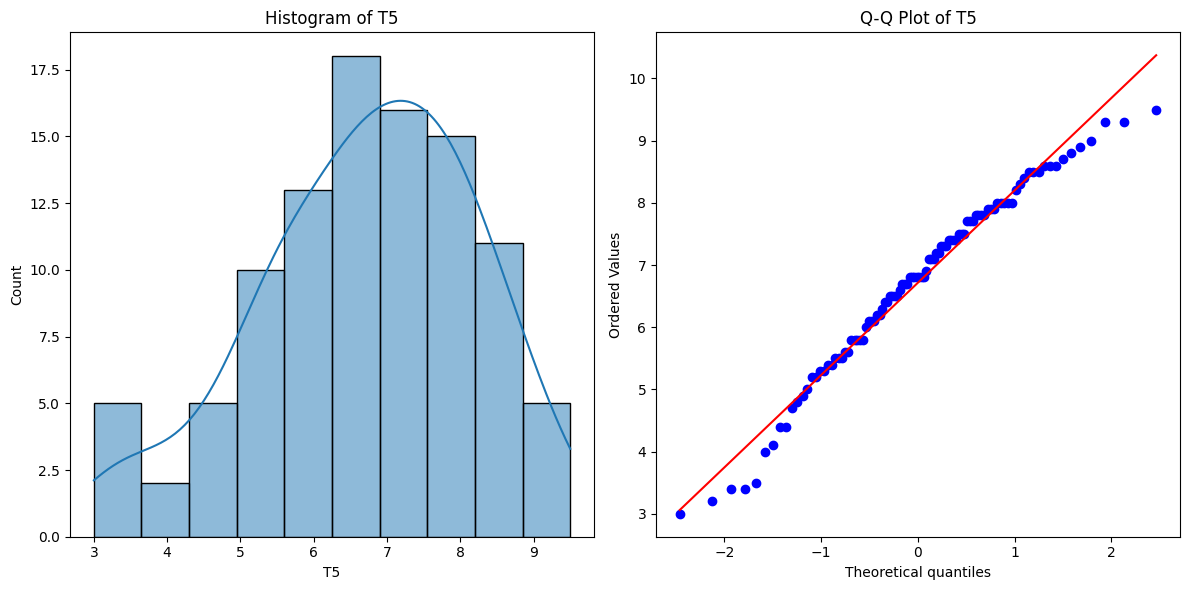

In [6]:
# Câu 4
import scipy.stats as stats
# Các cột cần kiểm tra
columns_to_check = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'NGONNGU', 'LOGIC']

# Lưu kết quả kiểm định
shapiro_results = {}

# Kiểm định Shapiro-Wilk cho từng cột
for col in columns_to_check:
    stat, p_value = stats.shapiro(df[col].dropna())  # Bỏ giá trị NaN
    shapiro_results[col] = p_value
    print(f"Cột {col}: p-value = {p_value:.4f}")

# Bước 2: Xác định cột gần với phân phối chuẩn nhất
# Lọc các cột có p-value >= 0.05
near_normal_columns = [col for col, p in shapiro_results.items() if p >= 0.05]

print("\nCác cột có phân phối gần với phân phối chuẩn (p-value >= 0.05):")
print(near_normal_columns)

# Trực quan hóa: Histogram và Q-Q Plot
for col in near_normal_columns:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=10)
    plt.title(f"Histogram of {col}")
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    
    plt.tight_layout()
    plt.show()

In [7]:
# Câu 4. Độ lệch của cột VANDE sau khi cột VANDE transform qua hàm lập phương.
from scipy.stats import skew
skew(df['VANDE'] ** 3)

np.float64(1.8892328373518628)

In [17]:

# Bước 1: Xác định biến độc lập và biến phụ thuộc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Lọc các cột cần thiết
columns = ['T3', 'T4', 'T5', 'T6', 'KT', 'LOGIC']
data = df[columns].copy()


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import kurtosis
# Xử lý mã hóa biến phân loại "KT"
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
kt_encoded = encoder.fit_transform(data[['KT']])
encoded_kt_columns = encoder.get_feature_names_out(['KT'])

In [29]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['T3', 'T4', 'T5', 'T6']])

In [30]:
# Kết hợp dữ liệu mã hóa và dữ liệu chuẩn hóa
X = np.hstack((scaled_features, kt_encoded))
y = data['LOGIC']

In [12]:
type(y)

numpy.ndarray

In [31]:
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:

# Tính sai số
y_pred = model.predict(X_test)
errors = y_test.values - y_pred

print(errors[2])

-0.19502773488794745


In [34]:
X_test.shape

(20, 9)